In [2]:
import nltk
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import re
import itertools
import string
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df_tweets = pd.read_csv("data.csv", encoding = "ISO-8859-1")
df_tweets.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [4]:
df_tweets = df_tweets.drop_duplicates()
df_tweets.duplicated().sum()

0

In [5]:
factory = StopWordRemoverFactory()
sw = factory.get_stop_words()

def remove_tweet_special(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"").replace('user', "").replace('-', " ").replace(',', " ")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    return text.replace("http://", " ").replace("https://", " ")
                
def remove_number(text):
    return  re.sub(r"\d+", "", text)

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def word_tokenize_wrapper(text):
    return word_tokenize(text)


def normalizing_words(review):
    return ''.join(''.join(s)[:1] for _, s in itertools.groupby(review))

def preprocess_tweet(tweet):
    tweet.lower()
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    output = stemmer.stem(tweet)
    
    return output

In [6]:
d = {}
with open("NLP-Project/kbba.txt") as f:
    for line in f:
        (key, val) = line.split('\t')
        d[key] = val
        d[key] = re.sub(r'\n', '', d[key])

def process(ss):
    for line in ss:
        da = ''.join(d.get(word, word) for word in re.split( '(\W+)', line))
        return da

In [7]:
df_tweets['Tweet'] = df_tweets['Tweet'].str.replace('[...…]','').str.split().apply(lambda x: ' '.join([d.get(e, e) for e in x]))

In [8]:
df_tweets['Tweet'] = df_tweets['Tweet'].apply(remove_tweet_special)
df_tweets['Tweet'] = df_tweets['Tweet'].apply(remove_number)
df_tweets['Tweet'] = df_tweets['Tweet'].apply(remove_punctuation)
df_tweets['Tweet'] = df_tweets['Tweet'].apply(stopwords)
df_tweets['Tweet'] = df_tweets['Tweet'].apply(remove_whitespace_LT)
df_tweets['Tweet'] = df_tweets['Tweet'].apply(remove_whitespace_multiple)

In [9]:
df_tweets.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0
1,rt user user siapa terlambat memberikan tahu e...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berfikir aku tetap percaya tuhan pa...,0,0,0,0,0,0,0,0,0,0,0,0
3,user user aku aku ku tau matamu sipit diliat m...,0,0,0,0,0,0,0,0,0,0,0,0
4,user user kaum cebong kapir kelihatan dongokny...,1,1,0,1,1,0,0,0,0,0,1,0


In [10]:
# df_tweets['tweet_norm'] = df_tweets['Tweet'].apply(preprocess_tweet)
# df_tweets.to_csv('twit_ira.csv')

In [11]:
df_tweets = pd.read_csv('twit_ira.csv')
df_tweets.head()

,Unnamed: 0,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_norm
0,0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,saat semua cowok usaha lacak perhati kamu lant...
1,1,rt siapa terlambat memberikan tahu eluedan sar...,0,1,0,0,0,0,0,0,0,0,0,0,rt siapa lambat beri tahu eluedan sarap gaul c...
2,2,kadang aku berfikir aku tetap percaya tuhan pa...,0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir aku tetap percaya tuhan pa...
3,3,aku aku ku tahu matamu sipit diliat mana aku,0,0,0,0,0,0,0,0,0,0,0,0,aku aku ku tahu mata sipit liat mana aku
4,4,kaum cebong kapir kelihatan dongoknya awal tam...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir lihat dongok awal tambah don...


In [12]:
df_tweets['tweet_norm'] = df_tweets['tweet_norm'].astype(str)
df_tweets['tweet_norm'] = df_tweets['tweet_norm'].apply(remove_tweet_special)
df_tweets['tweet_norm'] = df_tweets['tweet_norm'].apply(remove_number)
df_tweets['tweet_norm'] = df_tweets['tweet_norm'].apply(remove_punctuation)
df_tweets['tweet_norm'] = df_tweets['tweet_norm'].apply(stopwords)
df_tweets['tweet_norm'] = df_tweets['tweet_norm'].apply(remove_whitespace_LT)
df_tweets['tweet_norm'] = df_tweets['tweet_norm'].apply(remove_whitespace_multiple)

In [13]:
def Clean_length(token):
    return [i for i in token if len(i) > 3]
def convert_to_string(listReview):
    return ' '.join(listReview)

df_tweets['tweet_norm2'] = df_tweets['tweet_norm'].apply(word_tokenize_wrapper)
df_tweets['tweet_norm2'] = df_tweets['tweet_norm2'].apply(Clean_length)
df_tweets['tweet_norm2'] = df_tweets['tweet_norm2'].apply(convert_to_string)

In [14]:
from wordcloud import WordCloud

In [15]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
token_vocab = df_tweets['tweet_norm2'].apply(word_tokenize_wrapper)
matrix = vectorizer.fit_transform([x for x in np.array(token_vocab)])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 1755


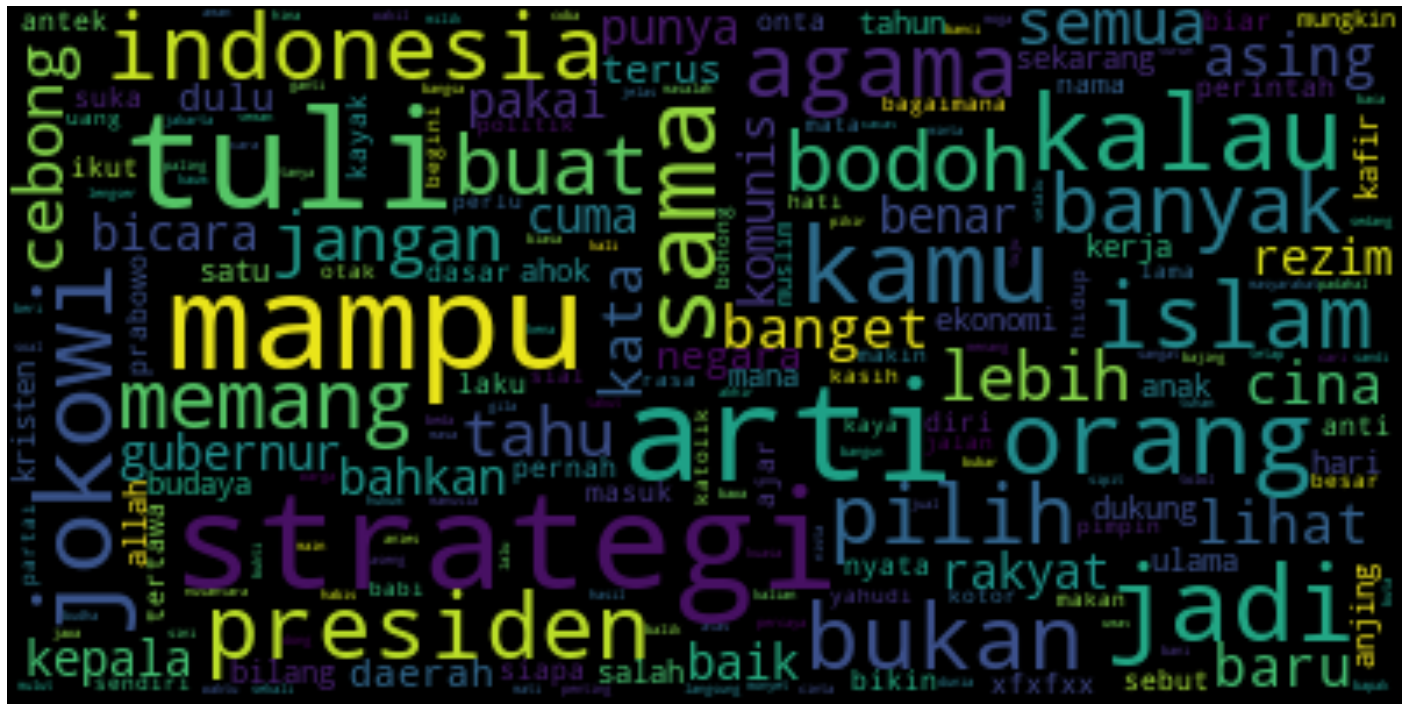

In [16]:
def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

tfidf2 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf2.columns = ['tfidf']    
plot_word_cloud(tfidf2.sort_values(by=['tfidf'], ascending=True))

In [17]:
unique_string = set()
for x in df_tweets['tweet_norm2']:
    for y in x.split():
        unique_string.add(y)
        
len(unique_string)

18868

In [18]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

In [19]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
X = []
sentences = list(df_tweets["tweet_norm2"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = df_tweets[["HS", "Abusive", "HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong"]]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

In [21]:
# First output
y1_train = y_train[["HS"]].values
y1_test =  y_test[["HS"]].values

# Second output
y2_train = y_train[["Abusive"]].values
y2_test =  y_test[["Abusive"]].values

# Third output
y3_train = y_train[["HS_Individual"]].values
y3_test =  y_test[["HS_Individual"]].values

# Fourth output
y4_train = y_train[["HS_Group"]].values
y4_test =  y_test[["HS_Group"]].values

# Fifth output
y5_train = y_train[["HS_Religion"]].values
y5_test =  y_test[["HS_Religion"]].values

# Fifth output
y6_train = y_train[["HS_Race"]].values
y6_test =  y_test[["HS_Race"]].values

# Fifth output
y7_train = y_train[["HS_Physical"]].values
y7_test =  y_test[["HS_Physical"]].values

# Fifth output
y8_train = y_train[["HS_Gender"]].values
y8_test =  y_test[["HS_Gender"]].values

# Fifth output
y9_train = y_train[["HS_Other"]].values
y9_test =  y_test[["HS_Other"]].values

# Fifth output
y10_train = y_train[["HS_Weak"]].values
y10_test =  y_test[["HS_Weak"]].values

# Fifth output
y11_train = y_train[["HS_Moderate"]].values
y11_test =  y_test[["HS_Moderate"]].values

# Fifth output
y12_train = y_train[["HS_Strong"]].values
y12_test =  y_test[["HS_Strong"]].values

In [22]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [23]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output7 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output8 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output9 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output10 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output11 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output12 = Dense(1, activation='sigmoid')(LSTM_Layer1)

model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6, output7, output8, output9, output10, output11, output12])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [24]:
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     1874400     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          117248      embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            129         lstm[0][0]                       
_______________________________________________________________________________________

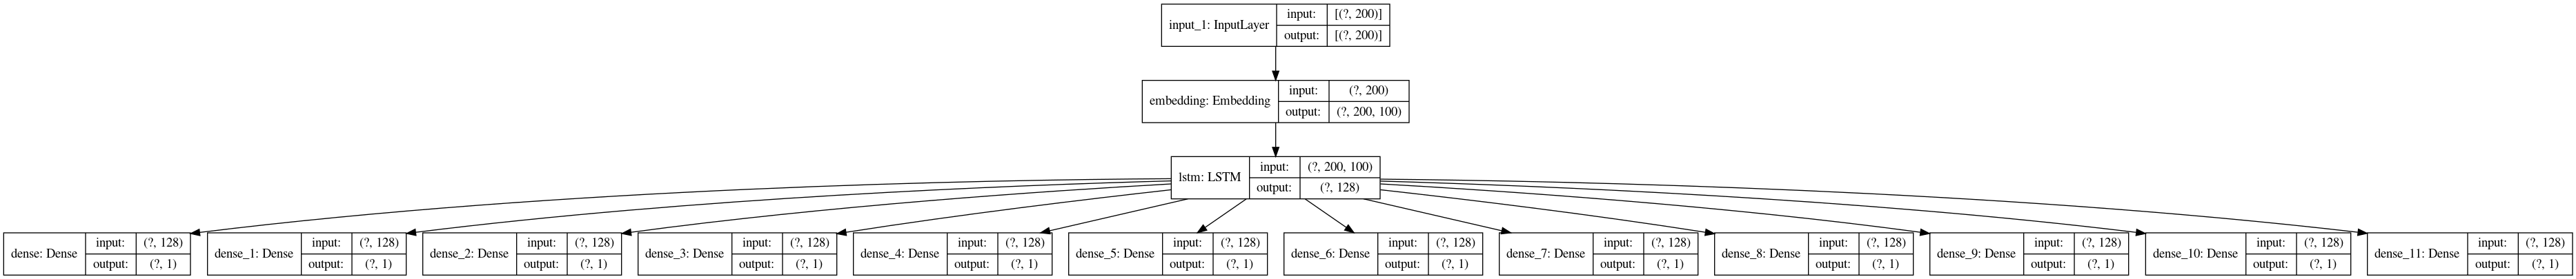

In [25]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4b.png', show_shapes=True, show_layer_names=True)

In [26]:
history = model.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train, y10_train, y11_train, y12_train], batch_size=100, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
104/104 [==============================] - 150s 1s/step - loss: 4.9881 - dense_loss: 0.6851 - dense_1_loss: 0.6699 - dense_2_loss: 0.5925 - dense_3_loss: 0.4478 - dense_4_loss: 0.2648 - dense_5_loss: 0.2134 - dense_6_loss: 0.1536 - dense_7_loss: 0.1559 - dense_8_loss: 0.6172 - dense_9_loss: 0.5777 - dense_10_loss: 0.4140 - dense_11_loss: 0.1962 - dense_acc: 0.5681 - dense_1_acc: 0.6171 - dense_2_acc: 0.7283 - dense_3_acc: 0.8483 - dense_4_acc: 0.9308 - dense_5_acc: 0.9484 - dense_6_acc: 0.9753 - dense_7_acc: 0.9789 - dense_8_acc: 0.7137 - dense_9_acc: 0.7388 - dense_10_acc: 0.8629 - dense_11_acc: 0.9624 - val_loss: 4.7079 - val_dense_loss: 0.6806 - val_dense_1_loss: 0.6676 - val_dense_2_loss: 0.5834 - val_dense_3_loss: 0.4263 - val_dense_4_loss: 0.2259 - val_dense_5_loss: 0.1762 - val_dense_6_loss: 0.1161 - val_dense_7_loss: 0.1408 - val_dense_8_loss: 0.5896 - val_dense_9_loss: 0.5700 - val_dense_10_loss: 0.3936 - val_dense_11_loss: 0.1379 - val_dense_acc: 0.5807 - val_dense_

In [92]:
score = model.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test, y10_test, y11_test, y12_test], verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

5/5 [==============================] - 1s 145ms/step - loss: 4.9978 - dense_loss: 0.6991 - dense_1_loss: 0.6747 - dense_2_loss: 0.6278 - dense_3_loss: 0.4402 - dense_4_loss: 0.2734 - dense_5_loss: 0.2320 - dense_6_loss: 0.1106 - dense_7_loss: 0.1669 - dense_8_loss: 0.5964 - dense_9_loss: 0.6142 - dense_10_loss: 0.4002 - dense_11_loss: 0.1622 - dense_acc: 0.5344 - dense_1_acc: 0.6031 - dense_2_acc: 0.6947 - dense_3_acc: 0.8397 - dense_4_acc: 0.9237 - dense_5_acc: 0.9389 - dense_6_acc: 0.9771 - dense_7_acc: 0.9618 - dense_8_acc: 0.7176 - dense_9_acc: 0.7099 - dense_10_acc: 0.8626 - dense_11_acc: 0.9618
Test Score: 4.997838497161865
Test Accuracy: 0.6990901231765747


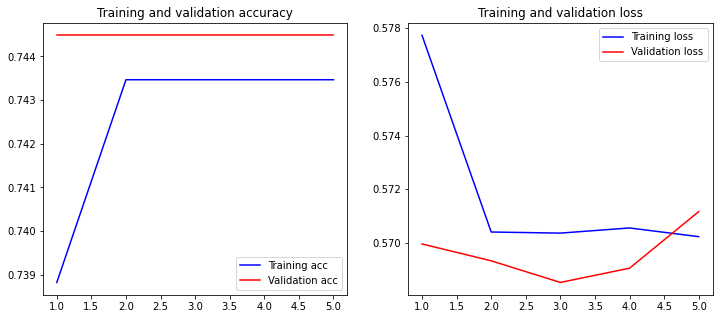

In [89]:
def plot_history(history):
    acc = history.history['dense_9_acc']
    val_acc = history.history['val_dense_9_acc']
    loss = history.history['dense_9_loss']
    val_loss = history.history['val_dense_9_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [ ]:
!pip install fastai